In [8]:
from pylib.CircuitSolvers import *
from pylib.DataAnalysis import *
from pylib.ErrorCalculations import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import * # imports trig functions like sin, cos, tan

# Prelab

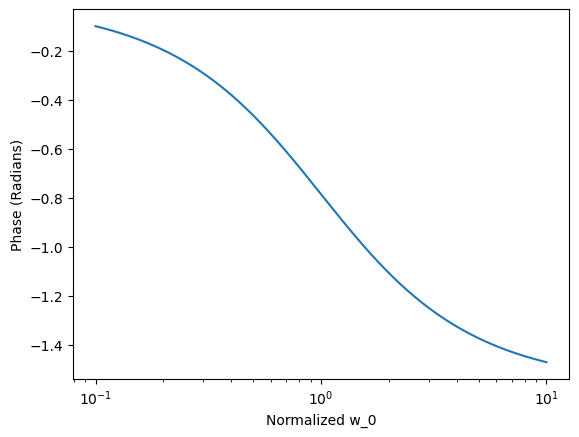

In [9]:
RC = 1.0
w_0 = 1.0
x = np.linspace(0.1*w_0, 10*w_0, 1000)
y = np.arctan(-x*RC)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel="Normalized w_0", ylabel="Phase (Radians)", xscale='log')
plt.show()

# Problem 2.1

In [10]:
R = 3e3
C = 4.7e-9
print(f"theoretical w for 3db signal is {(1/(R*C))/(2.0*np.pi)}")
R = dmm_err_resistance(2.93e3, 0.01e3)
C = dmm_err_capacitance(4.0e-9, 0.1e-9)
print(R)
print(C)
print(f"predicted (w/ real values) w for 3db signal is {(1/(R*C))/(2.0*np.pi)}")

theoretical w for 3db signal is 11287.584616446478
(2.93+/-0.10)e+03
(4.0+/-0.6)e-09
predicted (w/ real values) w for 3db signal is (1.36+/-0.21)e+04


In [11]:
R = dmm_err_resistance(2.93e3, 0.01e3)
C = dmm_err_capacitance(4.0e-9, 0.1e-9)

def phase(f, R=R, C=C):
    w = 2*np.pi*f
    return atan(1/(w*R*C))*180/np.pi
print("Phases")
print(phase(1.0e3))
print(agreement_test(phase(1.0e3), ufloat(84.407, 0.001)))
print(phase(1.0e4))
print(agreement_test(phase(1.0e4), ufloat(52.358, 0.001)))
print(phase(1.0e5))
print(agreement_test(phase(1.0e5), ufloat(8.391, 0.001)))

def gain(f, R=R, C=C):
    w = 2*np.pi*f
    return 1/sqrt(1.0+(1.0/np.square(w*R*C)))

V_out = ads_err_voltage_output(50.0e-3)
print("Gains")
print(gain(1.0e3)*V_out)
print(agreement_test(gain(1.0e3)*V_out, ads_err_volt_voltmeter(2.864e-3)))
print(gain(1.0e4)*V_out)
print(agreement_test(gain(1.0e4)*V_out, ads_err_volt_voltmeter(29.141e-3)))
print(gain(1.0e5)*V_out)
print(agreement_test(gain(1.0e5)*V_out, ads_err_volt_voltmeter(47.333e-3)))


Phases
85.8+/-0.6
False
54+/-4
True
7.7+/-1.2
True
Gains
0.0037+/-0.0026
True
0.030+/-0.021
True
0.050+/-0.035
True


In [12]:
print(f"We expect a gain of {gain(100)*V_out} with a phase of {phase(100)}")

We expect a gain of 0.00037+/-0.00026 with a phase of 89.58+/-0.07


# Problem 2.2

In [13]:
R = dmm_err_resistance(2.93e3, 0.01e3)
C = dmm_err_capacitance(4.0e-9, 0.1e-9)


def gain(f, R=R.n, C=C.n):
    w = 2*np.pi*f
    return 1/np.sqrt(1.0+(1.0/np.square(w*R*C)))

data = pd.read_csv('data/Lab02.2b-Network_Analysis.csv')
freq = np.array(list(data["Frequency (Hz)"][:]))


1000.000000000001


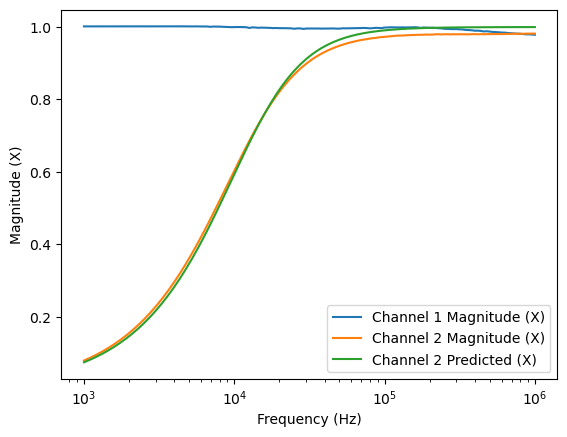

In [14]:

print(freq[0])
gain_out = gain(freq)
fig, ax = plt.subplots()
ax.plot(data["Frequency (Hz)"], data["Channel 1 Magnitude (X)"], label="Channel 1 Magnitude (X)")
ax.plot(data["Frequency (Hz)"], data["Channel 2 Magnitude (X)"], label="Channel 2 Magnitude (X)")
ax.plot(data["Frequency (Hz)"], gain_out, label="Channel 2 Predicted (X)")
ax.set(xscale='log', xlabel="Frequency (Hz)", ylabel="Magnitude (X)")
ax.legend()
plt.show()

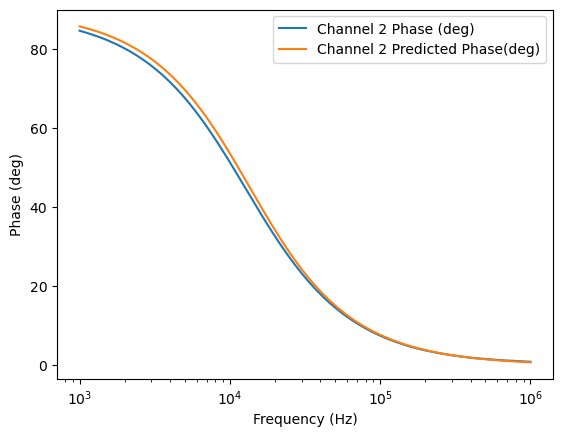

In [15]:
def phase(f, R=R.n, C=C.n):
    w = 2*np.pi*f
    return np.arctan(1/(w*R*C))*180/np.pi

phase_out = phase(freq)
fig, ax = plt.subplots()
ax.plot(data["Frequency (Hz)"], data["Channel 2 Phase (deg)"], label="Channel 2 Phase (deg)")
ax.plot(data["Frequency (Hz)"], phase_out, label="Channel 2 Predicted Phase(deg)")
ax.set(xscale='log')
ax.set(xlabel="Frequency (Hz)", ylabel="Phase (deg)")
ax.legend()
plt.show()

# Problem 2.3

In [16]:
print(1/(2*np.pi*1e3*0.15e-6))
print(1/(2*np.pi*1e4*100e-12))

1061.032953945969
159154.94309189534


# Problem 2.4

In [17]:
1/np.sqrt(8)
C = 2/(2*np.pi*5.7036e3*1e6)
print(C)

5.580859214948289e-11


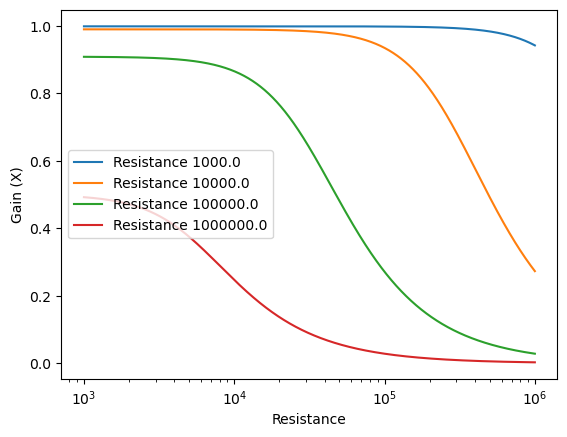

In [18]:
resistance = [1e3, 1e4, 1e5, 1e6]
freq = np.linspace(1e3, 1e6, 100000)
def gain(f, r, rs=1e6):
    return rs/np.sqrt(np.square(rs+r)+np.square(f*2*np.pi*rs*r*56e-12))
for r in resistance:
    plt.plot(freq, gain(freq, r), label=f"Resistance {r}")
plt.xscale('log')
plt.xlabel("Resistance")
plt.ylabel("Gain (X)")
plt.legend()
plt.show()

# Problem 2.5

In [19]:
print(dmm_err_capacitance(9.12e-9, 0.01e-9))
print(dmm_err_resistance(5.0e3, 0.01e3))

(9.12+/-0.28)e-09
(5.00+/-0.15)e+03


In [20]:
# part B and C
freq = np.array([1e3, 3e3, 5e3, 7e3, 9e3])
norm_freq = 1e3
m=freq/norm_freq
def amplitude(m):
    return 4.0/(m*np.pi)
print(amplitude(m))

def gain(w, r=5.0e3, c=10e-9):
    return 1/np.sqrt(1+np.square(w*r*c))
print(gain(freq))
print(gain(freq)*amplitude(m))

[1.27323954 0.42441318 0.25464791 0.18189136 0.14147106]
[0.99875234 0.98893635 0.9701425  0.94385836 0.91192151]
[1.27165097 0.41971762 0.24704476 0.17167968 0.1290105 ]


In [28]:
# ramp up
freq = np.array([1e3, 2e3, 3e3,4e3, 5e6, 6e3, 7e3, 8e3, 9e3])
m = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
def amplitude(m):
    return 2/(m*np.pi)
print(amplitude(m))

[0.63661977 0.31830989 0.21220659 0.15915494 0.12732395 0.1061033
 0.09094568 0.07957747 0.07073553 0.06366198]


# Problem 2.6

In [22]:
print(f"Predicted {resistance_err(5e3)*dmm_err_capacitance(10e-9, 0.1e-9)} ")
print(f"Measured {1/(84.897e-3/5e-6)}")

Predicted (5.0+/-0.4)e-05 
Measured 5.889489616829806e-05


In [23]:
(5e-3*9.3066e-3)/(0.99073)

4.696839704056605e-05

# Problem 2.7

In [25]:
L = 2.925e-3
w = 11e3*(2*np.pi)
R = w*L
print(R)

202.16148725850317


In [27]:
12.192e3*2*np.pi/220

348.20270575060687